<a href="https://colab.research.google.com/github/ambuj501/Google_Colab_Code/blob/master/Corona_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import all Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


####Obtain Dataset from Github

The data is provided by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and contains the number of reported daily cases by country. The dataset is available on GitHub and is updated regularly.

We're going to take the Time Series data only for confirmed cases (number of deaths and recovered cases are also available)

In [3]:
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 34564 (delta 0), reused 2 (delta 0), pack-reused 34557
Receiving objects: 100% (34564/34564), 175.52 MiB | 28.62 MiB/s, done.
Resolving deltas: 100% (20658/20658), done.


In [106]:
df = pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [107]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183


I only choosen the data of India

In [108]:
data = df[df['Country/Region']=='India']

remove first 4 columns named as 
Province/State   
Country/Region  
Lat  
Long  

In [109]:
data = data.iloc[:, 4:]

Check null value

In [110]:
data.isnull().sum().sum()

0

convert date in pandas date-time frame

In [111]:
daily_cases = data.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
dtype: int64

In [112]:
daily_cases.tail()

2020-06-17    366946
2020-06-18    380532
2020-06-19    395048
2020-06-20    410451
2020-06-21    425282
dtype: int64

Plot data to visualization

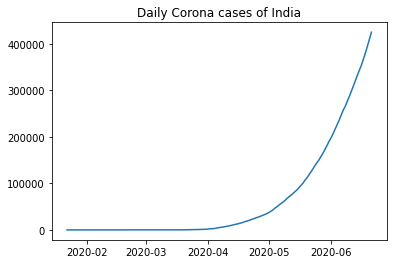

In [113]:
plt.plot(daily_cases)
plt.title("Daily Corona cases of India");
plt.show()

#Split data in Train and Test

In [114]:
train,test =daily_cases[:-7],daily_cases[-7:]

In [115]:
print(train.shape)
print(test.shape)

(145,)
(7,)


In [116]:
test_df = pd.DataFrame(test)
train_df = pd.DataFrame(train)

##Fit ARIMA Model

In [117]:
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 2, 3)
model = ARIMA(train, order=(p,d,q)) 
#8-30 0-1 3-4-8-10
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  143
Model:                 ARIMA(6, 2, 3)   Log Likelihood               -1064.638
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 22 Jun 2020   AIC                           2151.277
Time:                        08:05:30   BIC                           2183.868
Sample:                    01-24-2020   HQIC                          2164.520
                         - 06-14-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.5801      0.000   1.74e+05      0.000      80.579      80.581
ar.L1.D2.y     1.2480        nan        nan        nan         nan         nan
ar.L2.D2.y    -0.8375        nan        nan        n

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


##Performance Evaluation

In [118]:
forecast = model_fit.forecast(steps=7)[0]
forecast = forecast.astype(np.int64)
result = pd.DataFrame(forecast,columns=['Forecast'])
result.index = pd.to_datetime(test.index)
result['Actual'] = test_df[0]

In [119]:
result

,Forecast,Actual
2020-06-15,343859,343091
2020-06-16,355714,354065
2020-06-17,368109,366946
2020-06-18,381044,380532
2020-06-19,394311,395048
2020-06-20,407537,410451
2020-06-21,420602,425282


###Performance Visualisation

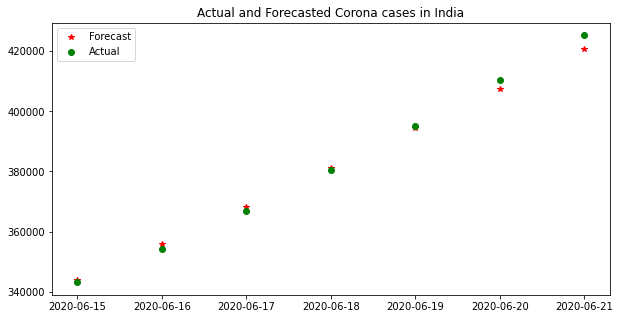

In [120]:
plt.figure(figsize=(10,5))
plt.plot(result['Forecast'],'r*', label='Forecast')
plt.plot(result['Actual'],'go', label='Actual')
plt.title('Actual and Forecasted Corona cases in India')
plt.legend()
plt.show()

###Forecast and see actual and Forecast

In [121]:
DAYS_TO_PREDICT = 14
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 2, 3)
model = ARIMA(train, order=(p,d,q)) 

model_fit = model.fit(disp=0)
#print(model_fit.summary())
forecast = model_fit.forecast(steps=DAYS_TO_PREDICT)[0]
forecast = forecast.astype(np.int64)
predicted_index = pd.date_range(start=train.index[-1],periods=DAYS_TO_PREDICT + 1,closed='right')

predicted_cases = pd.Series(data=forecast,index=predicted_index)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

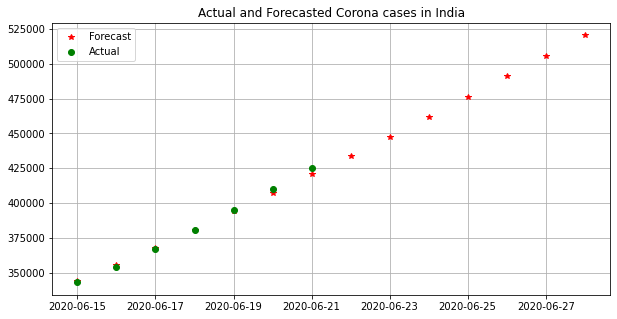

In [122]:
plt.figure(figsize=(10,5))
plt.plot(predicted_cases,'r*', label='Forecast')
plt.plot(result['Actual'],'go', label='Actual')
plt.title('Actual and Forecasted Corona cases in India')
plt.grid(b=None, which='major', axis='both')
plt.legend()
plt.show()

In [ ]:
#Train model on whole historical data and Forecast future value
NO Split

In [123]:
DAYS_TO_PREDICT = 7
from statsmodels.tsa.arima_model import ARIMA
(p, d, q) = (6, 2, 3)
model = ARIMA(daily_cases, order=(p,d,q)) 

model_fit = model.fit(disp=0)
#print(model_fit.summary())
forecast = model_fit.forecast(steps=DAYS_TO_PREDICT)[0]
forecast = forecast.astype(np.int64)
predicted_index = pd.date_range(start=daily_cases.index[-1],periods=DAYS_TO_PREDICT + 1,closed='right')

predicted_cases = pd.Series(data=forecast,index=predicted_index)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669

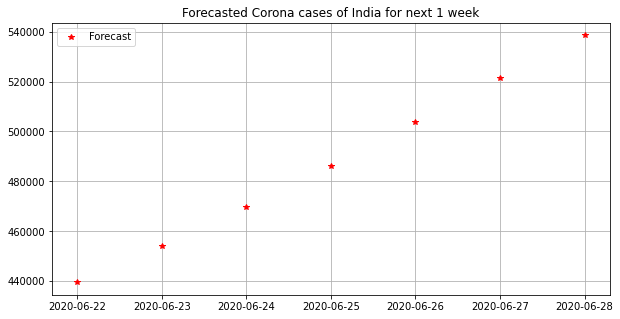

In [127]:
plt.figure(figsize=(10,5))
plt.plot(predicted_cases,'r*', label='Forecast')

plt.title('Forecasted Corona cases of India for next 1 week')
plt.grid(b=None, which='both', axis='both')
plt.legend()
plt.show()

In [129]:
predicted_cases = pd.DataFrame(predicted_cases)

In [130]:
predicted_cases

,0
2020-06-22,439511
2020-06-23,454157
2020-06-24,469675
2020-06-25,486217
2020-06-26,503645
2020-06-27,521279
2020-06-28,538505
